In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydaptivefiltering as pdf

In [2]:
def generate_qam(n, order=16):
    side = int(np.sqrt(order))
    indices = np.random.randint(0, order, n)
    x = np.arange(side) - (side - 1) / 2
    re, im = np.meshgrid(x, x)
    const = (re + 1j * im).flatten()
    # Normalização
    const /= np.sqrt(np.mean(np.abs(const)**2))
    return const[indices]

# 1. Gerar sinal
n_samples = 20000
s = generate_qam(n_samples)

# 2. Criar um canal com ISI (Interferência Intersimbólica)
# Um canal que espalha os pontos da constelação
h_channel = np.array([1.0, 0.5, 0.2j]) 
x_distorted = np.convolve(s, h_channel, mode='same')

# Adicionar ruído branco (SNR alta para facilitar visualização cega)
x_distorted += 0.001 * (np.random.randn(n_samples) + 1j * np.random.randn(n_samples))

In [3]:
# 3. Parâmetros do filtro
filter_order = 12
step_size = 0.001

# Inicialização Spike (Center Tap = 1)
w_init = np.zeros(filter_order + 1, dtype=complex)
w_init[filter_order // 2] = 1.0

# 4. Instanciar e Otimizar
sato_filter = pdf.Sato(filter_order=filter_order, step_size=step_size, w_init=w_init)
res = sato_filter.optimize(x_distorted, verbose=True)

y = res.outputs
e = res.errors

[Sato] Completed in 85.51 ms


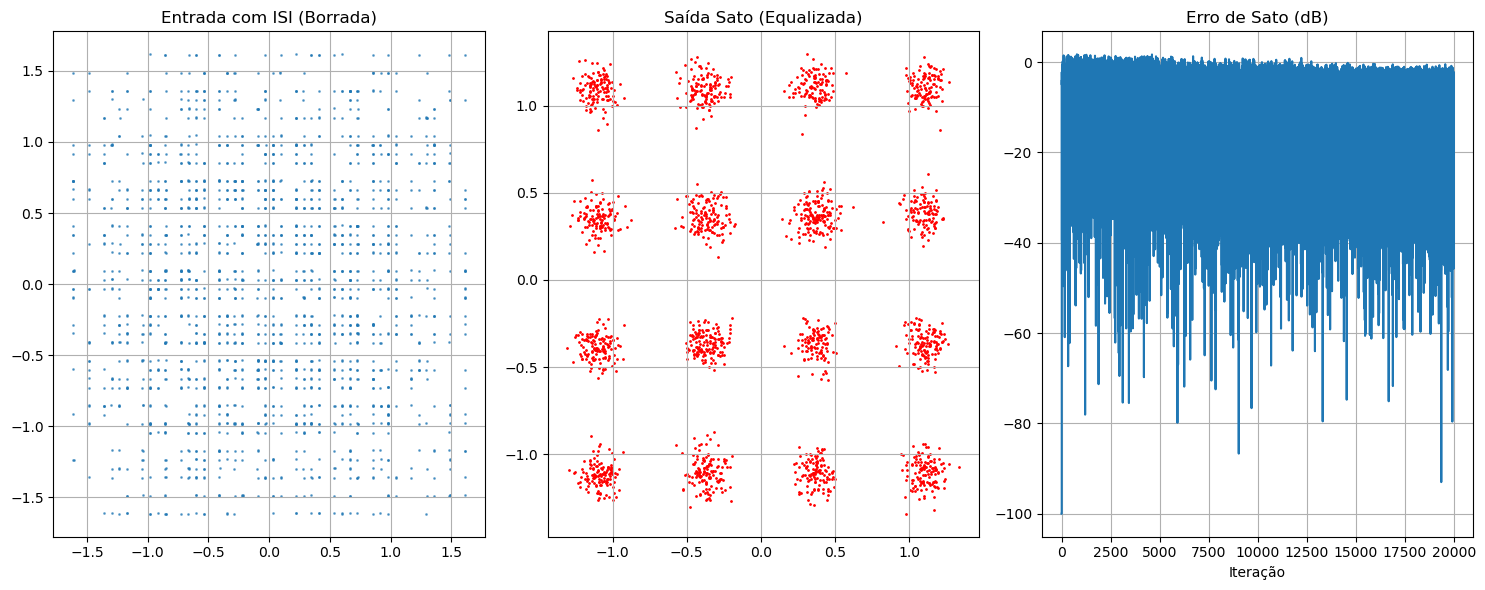

In [4]:
plt.figure(figsize=(15, 6))

# Plot da Constelação de Entrada
plt.subplot(1, 3, 1)
plt.scatter(x_distorted[-2000:].real, x_distorted[-2000:].imag, s=1, alpha=0.6)
plt.title("Entrada com ISI (Borrada)")
plt.grid(True)

# Plot da Constelação de Saída (Após convergência)
plt.subplot(1, 3, 2)
plt.scatter(y[-2000:].real, y[-2000:].imag, s=1, color='red')
plt.title("Saída Sato (Equalizada)")
plt.grid(True)

# Plot da Convergência do Erro
plt.subplot(1, 3, 3)
plt.plot(10 * np.log10(np.abs(e)**2 + 1e-10))
plt.title("Erro de Sato (dB)")
plt.xlabel("Iteração")
plt.grid(True)

plt.tight_layout()
plt.show()